**Walmart Stores Retail Analysis**



**Source for the project:**

https://www.kaggle.com/vik2012kvs/walmart-dataretail-analysis

**Overview:**

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. The business needs to understand the sales in their 45 stores and the impact of holidays and other factors. So, the objective of this project is to do the data analysis and provide insights to the stakeholders.

The data was available for years 2010, 2011 and 2012.



**Research Questions to answer:**
1. Which store is performing well and has a good growth rate? How significant are they from one another?
2. How are sales at different time periods?
3. Are the holidays affecting the sales in the stores? If so, how significant compared to non-holiday days?
4. Do the factors: temperature on day of sale, fuel price in the region, prevailing consumer price index and prevailing unemployment rate have an impact on the sales?



**Data wrangling and analysis:**



Import all modules that will be used for analysis.

In [ ]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import seaborn as sns
sns.set()
import matplotlib as plt
import matplotlib.pyplot as plt

from datetime import datetime as date
from datetime import datetime as dt

Retrieve the data stored in a repository on GitHub. The data is in a CSV file.

In [ ]:
# URL for the data file and read it into the data frame
url = 'https://raw.githubusercontent.com/bhascarp/Data_Files/main/Walmart_Store_sales.csv'
walmart_df = pd.read_csv(url)

Review the size of the dataframe. There are 6435 rows and 8 columns.

In [ ]:
walmart_df.shape

(6435, 8)

Review the data and columns in the data frame.

In [ ]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Preview few rows of the data.

In [ ]:
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Let's check if there are any null values in the data. There are no null values.

In [ ]:
walmart_df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Convert Date to datetime format, for efficient manipulation. 

In [ ]:
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'])


Check if the format has now changed.

In [ ]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
# Descriptive Statistics of data set
walmart_df.describe().astype(int)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435,6435,6435,6435,6435,6435,6435
mean,23,1046964,0,60,3,171,7
std,12,564366,0,18,0,39,1
min,1,209986,0,-2,2,126,3
25%,12,553350,0,47,2,131,6
50%,23,960746,0,62,3,182,7
75%,34,1420158,0,74,3,212,8
max,45,3818686,1,100,4,227,14


Here is sales distribution at a glance for all stores and for three years.

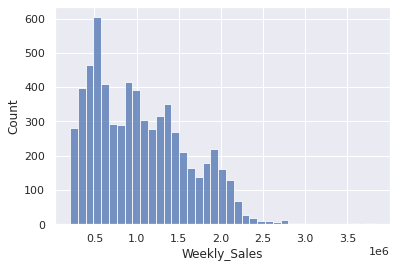

In [ ]:
# Distribution of overall sales
sns.histplot(walmart_df['Weekly_Sales'])

**Analysis of Sales at stores and at various time periods**

In [ ]:
# Adding year, month, day and quarter columns for use in later steps
walmart_df['year'] = walmart_df['Date'].dt.year
walmart_df['month'] = walmart_df['Date'].dt.month
walmart_df['day'] = walmart_df['Date'].dt.day
walmart_df['quarter'] = walmart_df['Date'].dt.quarter

Now, let's see the sales of each store for all years and which one has highest sales.

In [ ]:
#Store with highest sales
store_sales_df = walmart_df.groupby(['Store'])['Weekly_Sales'].sum().reset_index(name='Total Sales').sort_values(by='Total Sales', ascending=False)
round(store_sales_df,0).head(1)

,Store,Total Sales
19,20,301397792.0


In [ ]:
#Store with lowest sales
round(store_sales_df,0).tail(1)

,Store,Total Sales
32,33,37160222.0


So, Store 20 has highest sales and Store 33 has lowest sales. Let's plot to see all stores' sales to compare.

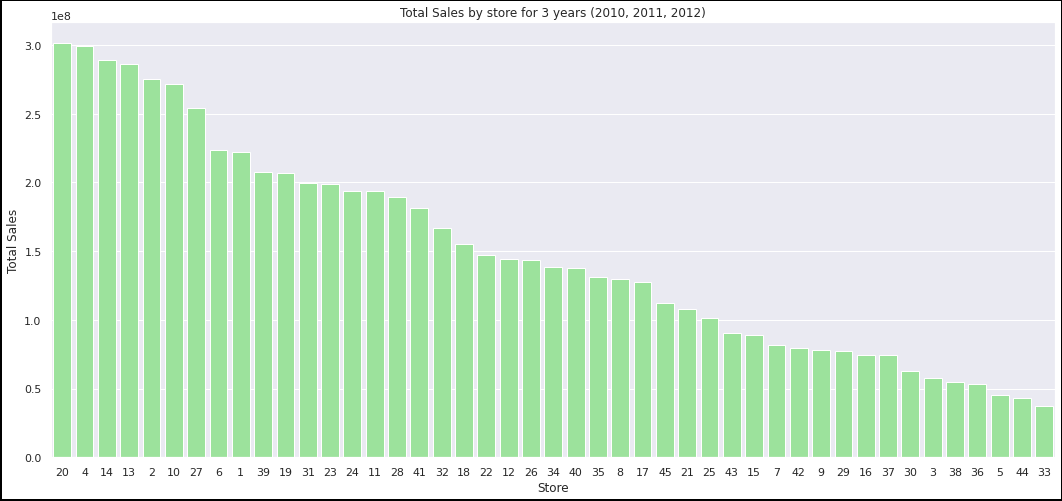

In [ ]:
plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Total Sales by store for 3 years (2010, 2011, 2012)")
sns.barplot(x='Store', y="Total Sales", data=store_sales_df, color='lightgreen', order = store_sales_df.sort_values('Total Sales', ascending=False).Store)

Let's test if the difference in sales is significant between two stores, choosing one high performing store and one low performing store: 20 and 30.

**Hypothesis test 1**

Objective: The purpose of this exercise is to test if difference in sales means between Store 20 and Store 30 is significant.

The hypotheses for this study are as such:

Ho: μ1 = μ2: There is no significant difference in sales between Store 20 and Store 30.

Ha: μ1 ≠ μ2: There is a significant difference in sales between Store 20 and Store 30.

In [ ]:
# Creating two data frames for stores 20 and 10

store_20_df = walmart_df.iloc[(walmart_df['Store'] == 20). values]
store_30_df = walmart_df.iloc[(walmart_df['Store'] == 30). values]

In [ ]:
#Run t-test
stats.ttest_ind(store_20_df['Weekly_Sales'], store_30_df['Weekly_Sales'])

Ttest_indResult(statistic=72.09712434435919, pvalue=1.3436351136716624e-184)

In [ ]:
import math
from statistics import mean, stdev

#create function that tests means between two samples as well as confidence interval (c.i.)
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")
    
get_95_ci(store_20_df['Weekly_Sales'], store_30_df['Weekly_Sales'])

'The difference in means at the 95% confidence interval (two-tail) is between -1714472.5814754274 and -1623721.9267763216.'

In [ ]:
# is the p-value < 0.05?
1.3436351136716624e-184 < 0.05

True

**Hypothesis test 1 Results**:

The difference in sales means at the 95% confidence interval (two-tail) between store 20 and store 30 is between -1714473 and -1623722, where the p-value is less than the alpha level of 0.05, and the confidence interval range does not include zero.

Conclusion:

The result of this t-test is to reject the null hypothesis that there is no significant difference in sales means between store 20 and store 30.

There is a significant difference in sales means between store 20 and store 30.

Few more tests with different combinations of stores:

In [ ]:
# Another t-test between store 4 and store 40. The result is showing the difference is significant.
store_4_df = walmart_df.iloc[(walmart_df['Store'] == 4). values]
store_40_df = walmart_df.iloc[(walmart_df['Store'] == 40). values]
stats.ttest_ind(store_4_df['Weekly_Sales'], store_40_df['Weekly_Sales'])

Ttest_indResult(statistic=46.36589268444183, pvalue=1.6614729937834105e-134)

In [ ]:
# Another t-test between store 35 and store 42. The result is showing the difference is significant.
store_35_df = walmart_df.iloc[(walmart_df['Store'] == 35). values]
store_42_df = walmart_df.iloc[(walmart_df['Store'] == 42). values]
stats.ttest_ind(store_35_df['Weekly_Sales'], store_42_df['Weekly_Sales'])

Ttest_indResult(statistic=20.00861707219988, pvalue=3.567882145970261e-56)

In [ ]:
# Another t-test between store 14 and store 10. The result is showing the difference is significant.
store_14_df = walmart_df.iloc[(walmart_df['Store'] == 14). values]
store_10_df = walmart_df.iloc[(walmart_df['Store'] == 10). values]
stats.ttest_ind(store_14_df['Weekly_Sales'], store_10_df['Weekly_Sales'])

Ttest_indResult(statistic=3.3154711321241632, pvalue=0.0010337941184077406)

In [ ]:
# Another t-test between store 12 and store 26. The result is showing the difference is NOT significant (p-value > 0.05).
store_12_df = walmart_df.iloc[(walmart_df['Store'] == 12). values]
store_26_df = walmart_df.iloc[(walmart_df['Store'] == 26). values]
stats.ttest_ind(store_12_df['Weekly_Sales'], store_26_df['Weekly_Sales'])

Ttest_indResult(statistic=0.40990472309963966, pvalue=0.6821848628835425)

This indicates that where there is higher difference in sales between stores, it is actually significant.

Here below another illustration showing how sales are distributed around median, including minimum, maximum and outliers of sales, for all stores.

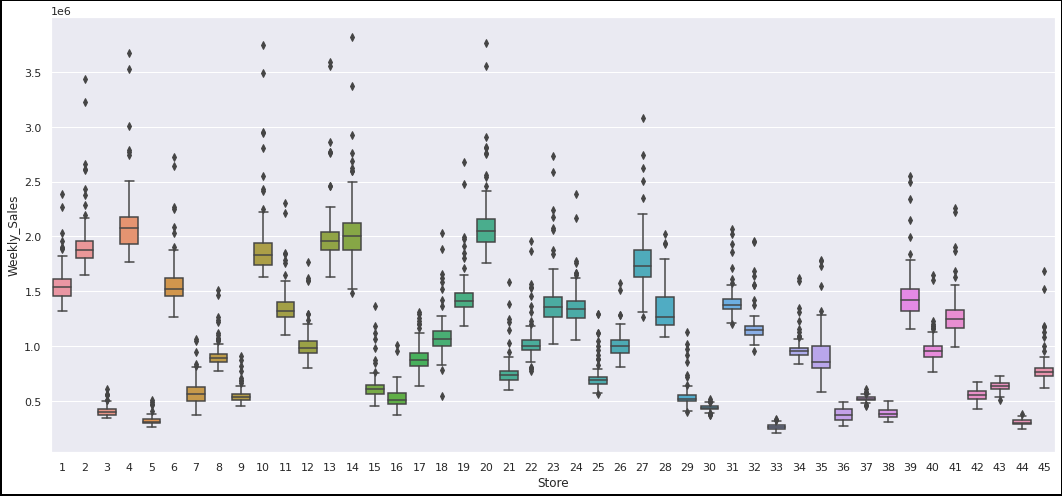

In [ ]:
# Box plot showing how the sales are distributed around medians with outliers, for each store. 
plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
sns.boxplot(y='Weekly_Sales', x='Store', data=walmart_df)

**Sales variation**


Let's see the fluctuations of sales in stores. Which store has highest variation in sales?

In [ ]:
MaxStd = walmart_df.groupby('Store')['Weekly_Sales'].std().reset_index(name='Standard Deviation').sort_values(by='Standard Deviation', ascending=False)
MaxStd['Standard Deviation'] = MaxStd['Standard Deviation'].round(2)
MaxStd.head()

,Store,Standard Deviation
13,14,317569.95
9,10,302262.06
19,20,275900.56
3,4,266201.44
12,13,265507.00


Let's plot the sales variation by store.

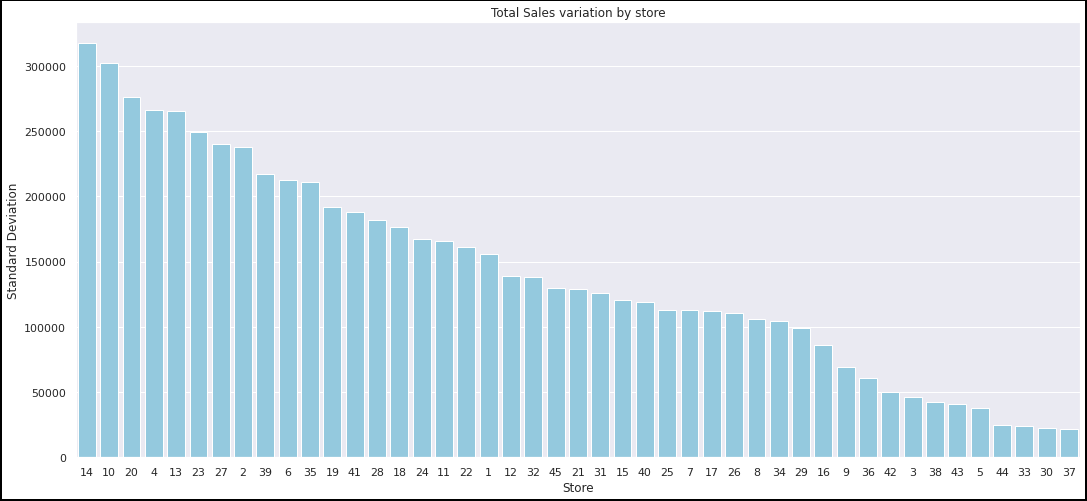

In [ ]:
plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Total Sales variation by store")
sns.barplot(x='Store', y="Standard Deviation", data=MaxStd, color='skyblue', order = MaxStd.sort_values('Standard Deviation', ascending=False).Store)

So, store 14 has highest sales variation, while store 37 has least variation.

**Monthly wise sales for all stores for all years**




Let's see how the stores performed by month in all years.

In [ ]:
#Monthly sale of all stores

MonthlySale = walmart_df.groupby('month')['Weekly_Sales'].sum().reset_index(name='Total Sales').sort_values(by='Total Sales', ascending=False)
MonthlySale['Total Sales'] = MonthlySale['Total Sales'].round(2).astype(int)    #astype(int) converts number with any exponential format to full integer
MonthlySale.head()

,month,Total Sales
3,4,645323889
4,5,605696592
9,10,602918857
11,12,599076091
6,7,593313937


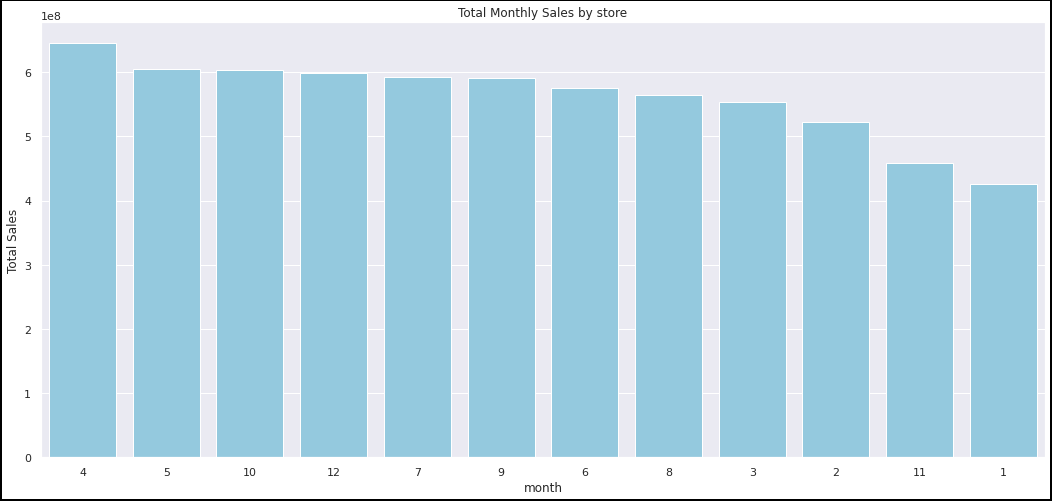

In [ ]:
plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Total Monthly Sales by store")
sns.barplot(x='month', y="Total Sales", data=MonthlySale, color='skyblue', order = MonthlySale.sort_values('Total Sales', ascending=False).month)

As seen in above plot, April month has highest sales while January the lowest.

**Monthly sales by year**

Let's examine monthly sale at all stores by year.



Monthly sale for *2010*

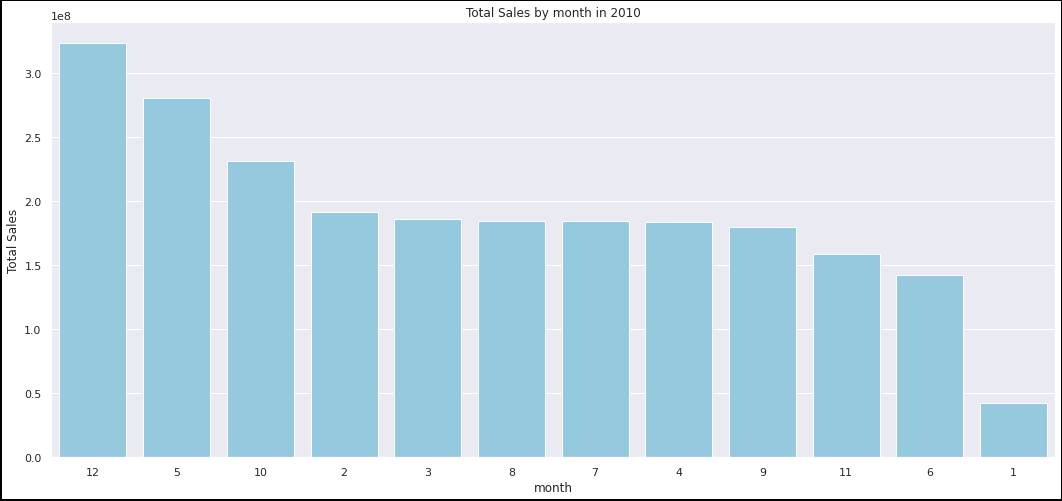

In [ ]:
#Monthly sale for 2010
MonthSale2010 = walmart_df[walmart_df['year'] == 2010].groupby('month')['Weekly_Sales'].sum().reset_index(name='Total Sales').sort_values(by='Total Sales', ascending=False)
MonthSale2010['Total Sales'] = MonthSale2010['Total Sales'].round(2)
plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Total Sales by month in 2010")
sns.barplot(x='month', y="Total Sales", data=MonthSale2010, color='skyblue', order = MonthSale2010.sort_values('Total Sales', ascending=False).month)

Monthly sale for 2011

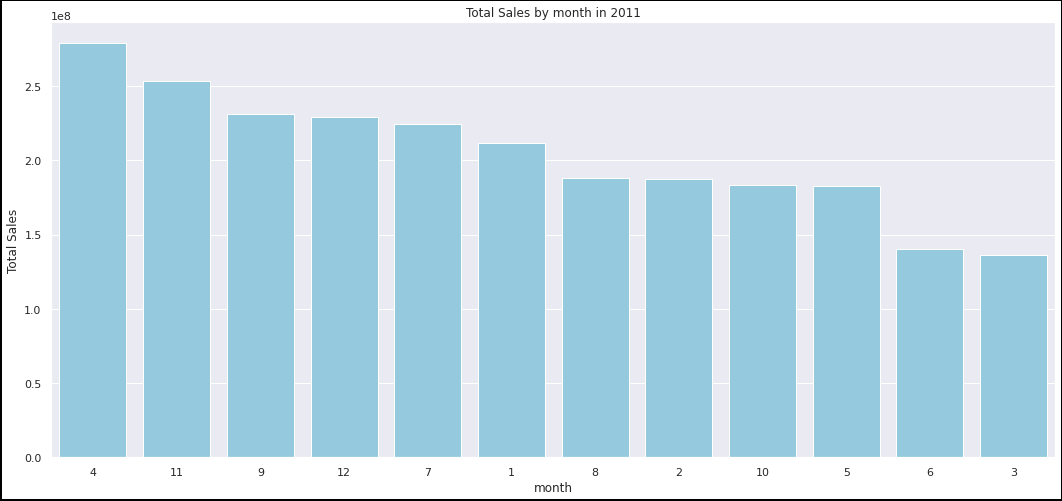

In [ ]:
#Monthly sale for 2011
MonthSale2011 = walmart_df[walmart_df['year'] == 2011].groupby('month')['Weekly_Sales'].sum().reset_index(name='Total Sales').sort_values(by='Total Sales', ascending=False)
MonthSale2011['Total Sales'] = MonthSale2011['Total Sales'].round(2)
plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Total Sales by month in 2011")
sns.barplot(x='month', y="Total Sales", data=MonthSale2011, color='skyblue', order = MonthSale2011.sort_values('Total Sales', ascending=False).month)

Monthly sale for 2012

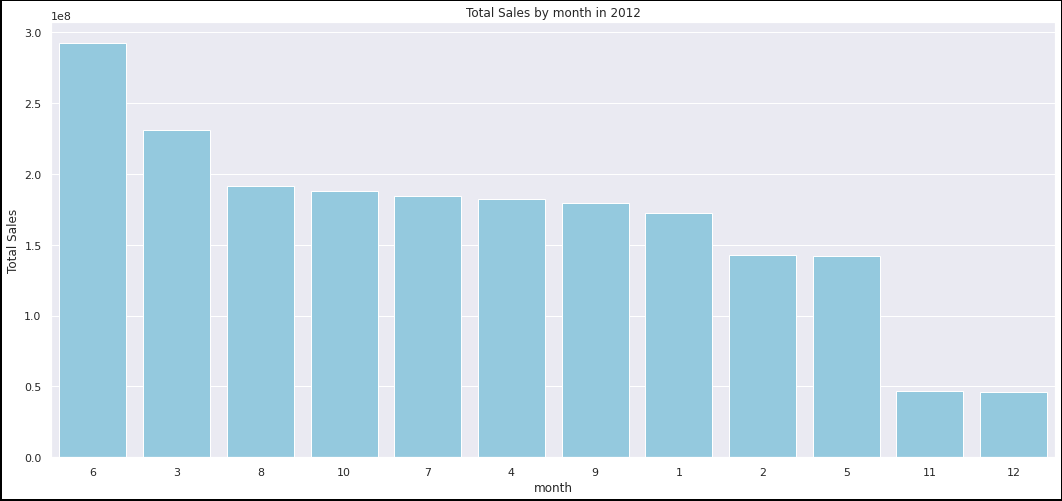

In [ ]:
#Monthly sale for 2012
MonthSale2012 = walmart_df[walmart_df['year'] == 2012].groupby('month')['Weekly_Sales'].sum().reset_index(name='Total Sales').sort_values(by='Total Sales', ascending=False)
MonthSale2012['Total Sales'] = MonthSale2012['Total Sales'].round(2)
plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Total Sales by month in 2012")
sns.barplot(x='month', y="Total Sales", data=MonthSale2012, color='skyblue', order = MonthSale2012.sort_values('Total Sales', ascending=False).month)

**Sales by each year**


Let's examine sales at all stores by each year.

In [ ]:
# Sales by each year
YearlySale = walmart_df.groupby('year')['Weekly_Sales'].sum().reset_index(name='Total Sales').sort_values(by='Total Sales', ascending=False)
YearlySale['Total Sales'] = YearlySale['Total Sales'].round(0).astype(int)
YearlySale.head()

,year,Total Sales
1,2011,2448200007
0,2010,2288886120
2,2012,2000132859


Let's plot sales by year.

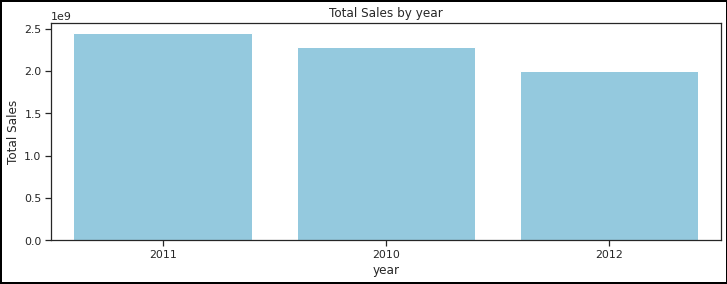

In [ ]:
plt.figure(figsize=(12,4), edgecolor='black', linewidth=4)
plt.title("Total Sales by year")
sns.barplot(x='year', y="Total Sales", data=YearlySale, color='skyblue', order = YearlySale.sort_values('Total Sales', ascending=False).year)

**Stores' Growth Rates**


Now, let's review the sales growth rates of the stores, for Quarter 3 of 2012.



In [ ]:
# Let's review Quarter 3, 2012 sales
q3_2012_sales = walmart_df[(walmart_df['quarter'] == 3) & (walmart_df['year'] == 2012)]. groupby('Store')['Weekly_Sales'].sum().reset_index(name='Total Sales').sort_values(by='Total Sales',ascending=False)

In [ ]:
#Store with highest Quarter 3, 2012 sales.
q3_2012_sales.head(1).round(0)

,Store,Total Sales
3,4,25652119.0


In [ ]:
#Store with lowest Quarter 3, 2012 sales.
q3_2012_sales.tail(1).round(0)

,Store,Total Sales
32,33,3177072.0


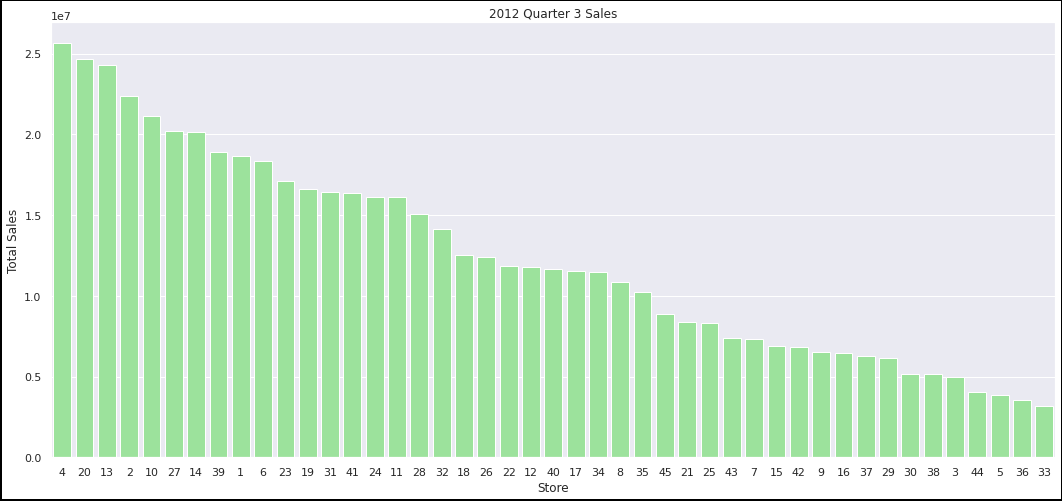

In [ ]:
# Plot - Quarter 3, 2012 sales of all stores, from highest to lowest sorted.
plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("2012 Quarter 3 Sales")
sns.barplot(x='Store', y="Total Sales", data=q3_2012_sales, color='lightgreen', order = q3_2012_sales.sort_values('Total Sales', ascending=False).Store)

In [ ]:
#Let's move on to check growth rates

#Creating date filter variables, for use in next step
Q3_date_from = pd.Timestamp(date(2012,7,1))
Q3_date_to = pd.Timestamp(date(2012,9,30))
Q2_date_from = pd.Timestamp(date(2012,4,1))
Q2_date_to = pd.Timestamp(date(2012,6,30))


In [ ]:
#Collecting the data of Q3 and Q2 of 2012 from original dataset.

q2_2012_data = walmart_df[(walmart_df['Date'] >= Q2_date_from) & (walmart_df['Date'] <= Q2_date_to)]
q3_2012_data = walmart_df[(walmart_df['Date'] >= Q3_date_from) & (walmart_df['Date'] <= Q3_date_to)]

In [ ]:
#Finding the sum of weekly sales of each store in Q2, 2012
#creating q2_2012 data frame (with store and sales columns)
q2_2012 = pd.DataFrame(q2_2012_data.groupby('Store')['Weekly_Sales'].sum())
q2_2012.reset_index(inplace=True)
q2_2012.rename(columns={'Weekly_Sales': 'q2_2012_Weekly_Sales'}, inplace=True)


#Finding the sum of weekly sales of each store in Q3, 2012
#creating q3_2012 data frame (with store and sales columns)
q3_2012 = pd.DataFrame(q3_2012_data.groupby('Store')['Weekly_Sales'].sum())
q3_2012.reset_index(inplace=True)
q3_2012.rename(columns={'Weekly_Sales': 'q3_2012_Weekly_Sales'}, inplace=True)


#Mergeing Q2 and Q3 data on Store as a common column
q3_2012_growth = q2_2012.merge(q3_2012, how='inner', on='Store')

In [ ]:
# Growth rate formula is defined as the ratio of difference in present value to past value by past value whole multiplied with 100 (since it is in percentage)
# ((Present value — Past value )/Past value )*100
#Calculating Growth rate of each Store and collecting it into a dataframe (Growth_Rate column is added) 

q3_2012_growth['Growth_Rate'] = (q3_2012_growth['q3_2012_Weekly_Sales']-q3_2012_growth['q2_2012_Weekly_Sales'])/q3_2012_growth['q2_2012_Weekly_Sales']
q3_2012_growth['Growth_Rate'] = round(q3_2012_growth['Growth_Rate'],2)


In [ ]:
#Growth Rate results

#Store with highest growth rate. Actually it is in negative, which means a loss.
q3_2012_growth.sort_values('Growth_Rate', ascending=False).head(1)

,Store,q2_2012_Weekly_Sales,q3_2012_Weekly_Sales,Growth_Rate
15,16,6626133.44,6441311.11,-0.03


In [ ]:
#Store with lowest growth rate. It is in negative, which is a loss.
q3_2012_growth.sort_values('Growth_Rate', ascending=False).tail(1)

,Store,q2_2012_Weekly_Sales,q3_2012_Weekly_Sales,Growth_Rate
13,14,24427769.06,20140430.4,-0.18


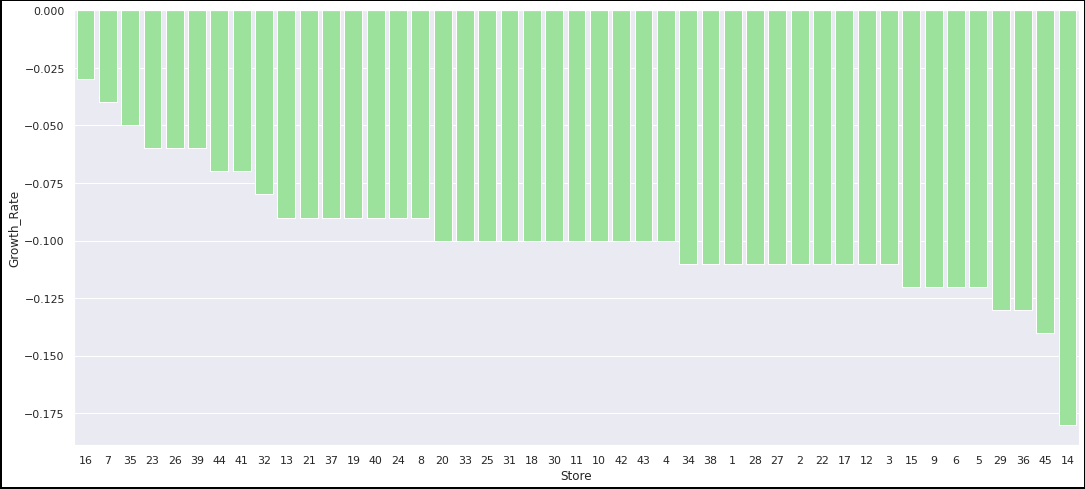

In [ ]:
#Growth Rate plot
plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)

sns.barplot(x='Store', y="Growth_Rate", data=q3_2012_growth, color='lightgreen', order = q3_2012_growth.sort_values('Growth_Rate', ascending=False).Store)

Results for growth rate:

From the above, we can infer that quarter 3, 2012 did not have growth but loss. Store 16 had least loss of 3%, while store 14 had highest loss of 18%.



**Holidays Impact on sales**

Now let's analyse holidays effect on sales. How the stores are performing during holidays and compare it to the sales on non-holidays. This is to check all holidays combined, the mean sales is compared to the mean sales on non-holiday days.



Holiday Events:

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12

Note: We have data for three years: 2010, 2011 and 2012.


Let's see if the difference in sales is significant between days on holidays and days on non-holidays, for all three years, 2010, 2011 and 2012. 

**Hypothesis test 2**

Objective: The purpose of this exercise is to test if difference in sales means between holidays and non-holidays is significant.

The hypotheses for this study are as such:

Ho: μ1 = μ2: There is no significant difference in sales between holidays and non-holidays.

Ha: μ1 ≠ μ2: There is a significant difference in sales between holidays and non-holidays.

In [ ]:
# Creating two data frames for holday flags (0 for dates with non-holidays, 1 for days with holidays )

holidayflag0_df = walmart_df.iloc[(walmart_df['Holiday_Flag'] == 0). values]
holidayflag1_df = walmart_df.iloc[(walmart_df['Holiday_Flag'] == 1). values]

In [ ]:
#t-test to see the significance of difference
stats.ttest_ind(holidayflag0_df['Weekly_Sales'], holidayflag1_df['Weekly_Sales'])


Ttest_indResult(statistic=-2.9608919093259036, pvalue=0.003078699263818616)

In [ ]:
# Is P-value less than 0.05?
0.003078699263818616 < 0.05

True

In [ ]:
# How much difference in sales between days of holidays and non-holidays
get_95_ci(holidayflag0_df['Weekly_Sales'], holidayflag1_df['Weekly_Sales'])


'The difference in means at the 95% confidence interval (two-tail) is between 21932.45833089199 and 141330.56596250602.'

**Hypothesis test 2 Results:**

The difference in sales means at the 95% confidence interval (two-tail) between non-holidays and holidays is between 21933 and 141331, where the p-value is less than the alpha level of 0.05, and the confidence interval range does not include zero.

Conclusion:

The result of this t-test is to reject the null hypothesis that there is no significant difference in sales means between store 20 and store 30.

There is a significant difference in sales means between non-holidays and holidays.

Below is the graphic showing the holiday and non-holiday sales difference.

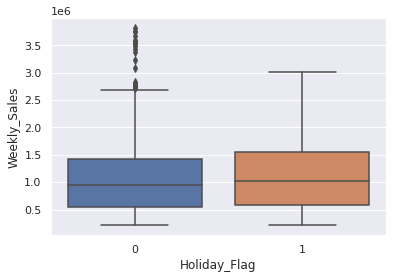

In [ ]:
# Plot to see the difference. Holidays mean sales is showing higher than the mean of non-holiday sales.
sns.boxplot(y='Weekly_Sales', x='Holiday_Flag', data=walmart_df)

**Impact of other variables on Sales**


Let's see how the variables: Temperature on the sale of day, Fuel Price in the region, prevailing Consumer Price Index (CPI), prevailing Unemployment rate, affect the sales.

In [ ]:
# Check the Correlations of variables to the sales. The correlation coefficient and the P-value indicate how the variables
# are related to the target variable.

# Temperature to Sales
stats.pearsonr(walmart_df['Temperature'], walmart_df['Weekly_Sales'])

(-0.06381001317946956, 3.0076476258601934e-07)

In [ ]:
# Fuel Price to Sales
stats.pearsonr(walmart_df['Fuel_Price'], walmart_df['Weekly_Sales'])

(0.009463786314475134, 0.44782874895250047)

In [ ]:
# CPI to Sales
stats.pearsonr(walmart_df['CPI'], walmart_df['Weekly_Sales'])

(-0.07263416204017624, 5.438292612224682e-09)

In [ ]:
# Unemployment rate to Sales
stats.pearsonr(walmart_df['Unemployment'], walmart_df['Weekly_Sales'])

(-0.1061760896579542, 1.3448365210357873e-17)

Visualization for the above correlations:

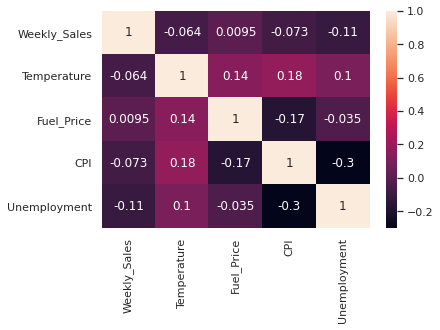

In [ ]:
#walmart_df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
corr_data = walmart_df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(corr_data, annot=True)

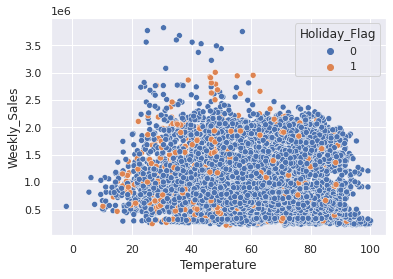

In [ ]:
# Plot - Sales vs Temperature on the day of sale
sns.scatterplot(y="Weekly_Sales", x='Temperature', hue='Holiday_Flag', data=walmart_df)

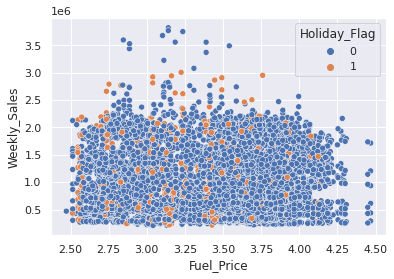

In [ ]:
# Plot - Sales vs Fuel Price in the region
sns.scatterplot(y="Weekly_Sales", x='Fuel_Price', hue='Holiday_Flag', data=walmart_df)

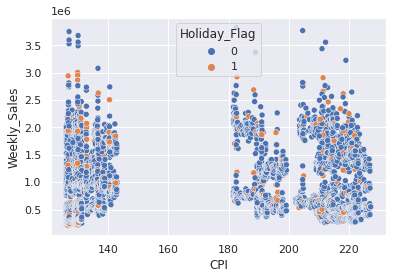

In [ ]:
# Plot - Sales vs Consumer Price Index
sns.scatterplot(y="Weekly_Sales", x='CPI', hue='Holiday_Flag', data=walmart_df)

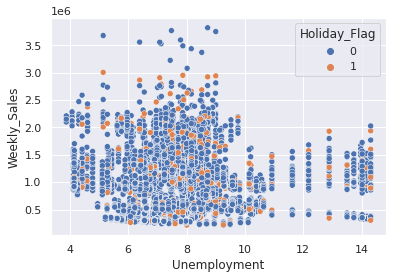

In [ ]:
# Plot - Sales vs Unemployment rate
sns.scatterplot(y="Weekly_Sales", x='Unemployment', hue='Holiday_Flag', data=walmart_df)

As we see above, based on the pearson coefficient and the P-value, we can infer as below:

1. Temperature is negatively correlated to the sales. The coefficient is very low at -0.064, so there is very little linear relationship between the two and hence no trend.
2. Fuel Price seems to have no effect on the sales. The coefficient is near zero and the P-value is very high, so it is not significant.
3. Similar to temperature, CPI and Unemployment rates have negative correlation to the sales but have extremely low linear relationship with the sales. 

As the scatter plots show, the data points are randomly distributed without any trend lines, which indicates that there is no linear relationship of these variables with the target sales variable. 

**Findings and conclusion:**

Below are the insights from the statistical tests and analyses that can be used to make decisions.

1. The store 20 is the winner overall for the span of three years, while the store 30 has struggled with least sales.
2. The differences in sales between high performers and low performers are indeed significant. This draws attention that high performers seem to have some benefits while the stores with low sales, did not have. The factores could be for example, inventory, promotions, etc. 
3. Store 14 has very high sales variation, followed by 10, 20. It appears high performers have noticable variation, indicating the presence of lot of activity.
4. Overall, the year 2011 turned out to be the winner in sales followed by 2010 and then 2012. December, April and June months were winners for years 2010, 2011 and 2012 respectively.
5. The most recent quarter 3, 2012 was tested for sales and the store 4 emerged as the winner, while the store 33 with least sales. But the growth rate for the same quarter turned out to be disaster with all stores having losses. Store 16 had least loss of 3%, while store 14 had highest loss of 18%.
6. The mean sales during holidays have proved to be higher than the mean sales on non-holiday days.
7. The temperature on sale day has extremely low impact on the sales. 
8. Fuel price has no effect on sales.
9. Consumer price index has extremely low impact on the sales. 
10. The unemployment rate has extremely low impact on the sales.

These insights should help the management and stakeholders to make better decisions and plan to meet business objectives.
